# Local Tourism Authority

![](https://png.pngtree.com/element_origin_min_pic/16/09/07/1557cfbd8d4092f.jpg)

__Problem:__ The CEO of the local Tourism Authority would like to know whether a family’s annual expenditure on recreation is related to their annual income. This information could be used to tailor marketing campaigns to certain consumer segments.

To answer this probelm we will utilize __Linear Regression__ and build a statistical model to quantify the relationship between the two variables. This relationship is of interest as it allows us to gain an understanding of the problem, to make predictions, or assess new data in light of the relationship.


In [5]:
import pandas as pd

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
data = pd.read_csv("./data/tourist.csv")
data.head()

,expenditure,income
0,2400,41200
1,2650,50100
2,2350,52000
3,4950,66000
4,3100,44500


So it appears we have 2 variables: `expenditures` and `income`. Since `expenditures` is likely to depend on a family's annual income, we will define `expenditures` as the __dependent / response variable (Y)__ and `income` as the __independent / explainatory variable (X)__. 

## Exploratory Data Anlaylsis

One of the first steps before getting into statistical modelling is to visualize the data. With 2 quantatiative variables, the best display is to use a __scatter plot__ to identify visual relationships. 

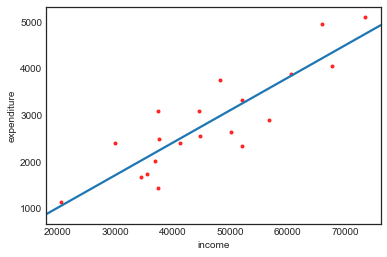

In [7]:
sns.regplot(data.income, data.expenditure, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

#### Scatter Plot Interpretation 
It can been seen that the relationship between income and expense has the following characteristics:

- __Direction:__ Positive _(i.e., as income increases so does expense)_
- __Shape:__ Roughly linear _(i.e., the points appear to fall along a straight line)_
- __Strength:__ Reasonably Strong _(i.e., there is considerable sfcatter about the linear line)_

We can also see the __linear regression model__ depectied were the linear stright line is the line connecting the average of the `y` values for each of the independent variable, `x`. 

## Correlation (Pearson's Correlation Coefficient)

Now that we have a visual depiction of the linearity of the data, we can quanitfy the strength of this linear relationship numerically using __correlation__, $\rho$ ("rho"). 

We will the `corr()` function to cacluate the sample correlation. 

In [8]:
data.corr()

,expenditure,income
expenditure,1.000000,0.875256
income,0.875256,1.000000


#### Interpretation
We get a correlation value of 0.875 which on a scale between +1, 0, and -1, this correlation is in fact quite strong. 

## Simple Linear Regression Model

So above when we plotted the scatter plot we added a parameter to also plot the __regression line__. This line is called the __Least Squares Regression (LSR) line__ and is used to determein the ebst line. Basically the best line will result in the smallest Residual Sum of Squares from all possible canidate lines. 

Now lets run the linear regression model using the `ols` command. 

In [10]:
# Ordinary Least Squares (ols) 

#create fitted model
lm = smf.ols(formula='expenditure ~ income', data = data).fit()

print(lm.params,'\n')

# summary of the regression coefficents
print(lm.summary())

Intercept   -372.645082
income         0.069572
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     58.95
Date:                Mon, 14 Jan 2019   Prob (F-statistic):           4.38e-07
Time:                        19:30:27   Log-Likelihood:                -153.05
No. Observations:                  20   AIC:                             310.1
Df Residuals:                      18   BIC:                             312.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

#### ANOVA
In addition, we can lso aobstain the __ANOVA__ table by running `stats.anova_lm()` function. 

In [16]:
anova_results = sm.stats.anova_lm(lm)
print(anova_results)

            df        sum_sq       mean_sq          F        PR(>F)
income     1.0  1.701080e+07  1.701080e+07  58.947318  4.379584e-07
Residual  18.0  5.194374e+06  2.885763e+05        NaN           NaN


## Model Diagnostics (Checking Assumptions)

Before we continue with Simple Linear Regression model building, 

### Residuals
#### Standardized Residuals

[Per Statistics How To](https://www.statisticshowto.datasciencecentral.com/what-is-a-standardized-residuals/) Standardized residuals are very similar to the kind of standardization you perform earlier on in statistics with z-scores. Z-scores allow you to standardize normal distributions so that you can compare your values; standardized residuals normalize your data in regression analysis and chi square hypothesis testing. 


The standardized residuals can be obtained from the fitted bodel using the following function:

In [17]:
#Creating a dataframe that includes the studentized residuals
sm.regression.linear_model.OLSResults.outlier_test(lm)

,student_resid,unadj_p,bonf(p)
0,-0.174792,0.863308,1.0
1,-0.880388,0.390925,1.0
2,-1.825625,0.085526,1.0
3,1.539761,0.142025,1.0
4,0.709843,0.487425,1.0
5,0.471994,0.642933,1.0
6,0.781255,0.445397,1.0
7,1.764647,0.095581,1.0
8,-1.332427,0.200306,1.0
9,-0.677950,0.506927,1.0


Text(0.5,1,'QQ Plot')

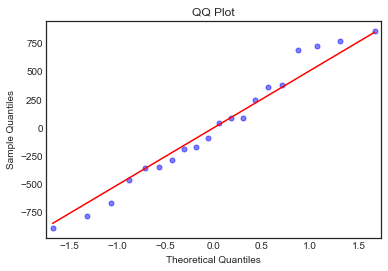

In [26]:
# statsmodels Q-Q plot on model residuals
qq = sm.ProbPlot(lm.resid)
fig = qq.qqplot(alpha=0.5, markersize=5, line='s')
plt.title("QQ Plot")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


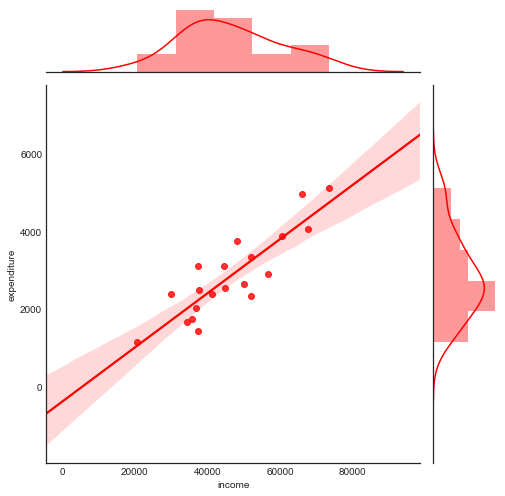

In [11]:
sns.jointplot("income", "expenditure", data=data, kind="reg",
              color="r", height=7)